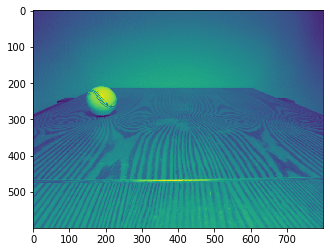

In [164]:
import math
import skimage.io
import matplotlib.pyplot as plt
import numpy as np


img1 = np.array(skimage.io.imread("serienbild/bild1.png"),np.uint8)
img2 = np.array(skimage.io.imread("serienbild/bild2.png"),np.uint8)
img3 = np.array(skimage.io.imread("serienbild/bild3.png"),np.uint8)
img4 = np.array(skimage.io.imread("serienbild/bild4.png"),np.uint8)
img5 = np.array(skimage.io.imread("serienbild/bild5.png"),np.uint8)

plt.imshow(img2)

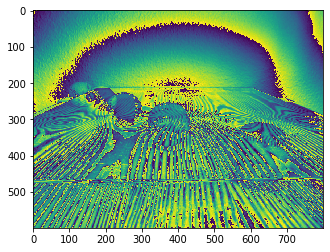

In [165]:
#averaging to get background without ball/"noise"
background = np.array(((img1+img2+img3+img4+img5)//2))
background.dtype
plt.imshow(background)




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


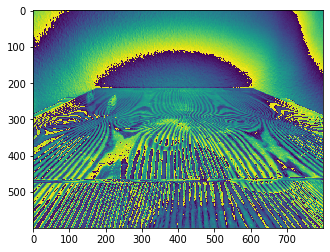

In [186]:
# Mitteln über Pixel aller Bilder und rausschmeißen des größten Wertes
def average_alternative(img1,img2,img3,img4,img5): 
    new_img = np.zeros(img1.shape) 
    
    for x in range(img1.shape[0]):
        for y in range(img1.shape[1]):
            new_img[x,y] = img1[x,y]+img2[x,y]+img3[x,y]+img4[x,y]+img5[x,y] - max(img1[x,y],img2[x,y],img3[x,y],img4[x,y],img5[x,y])
    return new_img

better_background = average_alternative(img1,img2,img3,img4,img5)


In [185]:

#change detection, creates a set with all pixels, that are diffrent between  background and img
def set_of_changed_pix(img, background):
    threshold= 100
    change_img = img - background
    changed_pixs = set()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if change_img[x,y] > threshold: changed_pixs.add((x,y,img[x,y])) 

    return changed_pixs


In [182]:
#Union of all changed Pixel
img1_ball = set_of_changed_pix(img1,better_background)
img2_ball = set_of_changed_pix(img2,better_background)
img3_ball = set_of_changed_pix(img3,better_background)
img4_ball = set_of_changed_pix(img4,better_background)
img5_ball = set_of_changed_pix(img5,better_background)

all_pixel_of_change = img1_ball.union(img2_ball,img3_ball,img4_ball,img5_ball)

len(all_pixel_of_change)

898642

In [192]:
#Put all changed Pixels of the images onto the background
def image_all_balls(set_of_all_balls,background):
    final_img = np.copy(background)
    
    for x in set_of_all_balls:
        final_img[x[0],x[1]] = x[2]
    return final_img
            

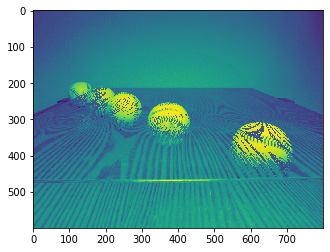

In [198]:
img_all_balls = image_all_balls(all_pixel_of_change, img1)#statt better_background mit img1 ausprobieren, klappt besser, da hintergrund schlechte qualität
plt.imshow(img_all_balls)
plt.imsave("all_balls_final.png", img_all_balls)